In [1]:
import pandas as pd 
import numpy as np 

all_df = pd.read_csv('combined_excel.csv')
all_df.head(5)

,PostID,PostURL,Post Title,PostContent,PostAuthor,PostUpvotes,PostTime,PostComments,CommentAuthor,CommentUpvotes,CommentTime,CommentReply,ReplyAuthor,ReplyUpvotes,ReplyTime
0,7jrba2,https://www.reddit.com/r/crypto/comments/7jrba...,Crypto is not cryptocurrency,NaN,davidw_-,611,12/14/2017 20:38,i don't think that a pinned post helps the sit...,pint,56,12/14/2017 21:37,Most people doesn't even seem to bother readin...,Natanael_L,24,12/14/2017 21:57
1,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,ELI5?,jabes52,1352,11/16/2016 0:53,Wikileaks told its readers they would publish ...,438498967,2991,11/16/2016 2:49
2,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,A few of us attentive sleuths knew something w...,Exec99,7122,11/15/2016 20:17,I've been following this theory in wikileaks/c...,tudda,1484,11/15/2016 20:37
3,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,[deleted],Exec99,7122,11/15/2016 20:17,I've been following this theory in wikileaks/c...,tudda,1484,11/15/2016 20:37
4,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,"If true, what would this mean?",manueslapera,417,11/15/2016 8:07,It means the contents of the file changed from...,DoWhile,795,11/15/2016 10:58


In [2]:
labels = pd.read_csv('sentiment_analysed.csv')
all_df = pd.concat([all_df,labels['sentiment']],axis=1)
all_df['sentiment'].value_counts()

sentiment
 1    15762
 0    11727
-1     9399
Name: count, dtype: int64

In [3]:
all_df['CommentUpvotes'].describe()

count    36888.000000
mean         8.761467
std        176.763859
min        -34.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      17076.000000
Name: CommentUpvotes, dtype: float64

In [4]:
print(all_df['PostID'].nunique())

df_sorted = all_df.assign(
    AbsCommentUpvotes = all_df['CommentUpvotes'].abs(),
    AbsReplyUpvotes = all_df['ReplyUpvotes'].abs()
).sort_values(by=['AbsCommentUpvotes', 'AbsReplyUpvotes'], ascending=False).drop(['AbsCommentUpvotes', 'AbsReplyUpvotes'], axis=1)

filtered_df = df_sorted.groupby('PostID').head(100)
filtered_df.head(5)


333


,PostID,PostURL,Post Title,PostContent,PostAuthor,PostUpvotes,PostTime,PostComments,CommentAuthor,CommentUpvotes,CommentTime,CommentReply,ReplyAuthor,ReplyUpvotes,ReplyTime,sentiment
2881,n7rl2y,https://www.reddit.com/r/CryptoCurrency/commen...,You hear about the kid who put in $500 into a ...,You hear about the kid who put in $500 into a ...,jonbristow,53901,5/8/2021 23:28,You also don't hear about me turning my $20 in...,louisgrc11,17076,5/9/2021 0:43,One time I turned 5$ into 11$ by day trading d...,LadyKillaByte,3648,5/9/2021 2:21,1
17722,qkai4d,https://www.reddit.com/r/CryptoCurrency/commen...,Squid Game from $2856 to $0.0008 in 10 minutes,That has to be the biggest and quickest rugpul...,MuffinMan12347,24108,11/1/2021 17:48,"Everyone died, and one person got rich. Seems ...",Previous_Advertising,15683,11/1/2021 18:09,"Say what you want about the devs, but they del...",deathbyfish13,5385,11/1/2021 19:12,1
2,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,A few of us attentive sleuths knew something w...,Exec99,7122,11/15/2016 20:17,I've been following this theory in wikileaks/c...,tudda,1484,11/15/2016 20:37,-1
3,5cz1fz,https://www.reddit.com/r/crypto/comments/5cz1f...,Wikileaks latest insurance files don't match h...,UPDATE: @Wikileaks has made a statement regard...,438498967,4325,11/15/2016 7:00,[deleted],Exec99,7122,11/15/2016 20:17,I've been following this theory in wikileaks/c...,tudda,1484,11/15/2016 20:37,0
22947,mtghzc,https://www.reddit.com/r/CryptoCurrency/commen...,What are some ways to earn some crypto (2$ for...,I live in a third world country and even 2 dol...,Duk01001111bito,21068,4/19/2021 0:49,"My setup: Brave, Presearch, Swash. If you can ...",Lupi_X,6631,4/19/2021 0:54,Ok wow the upvote to moon ratio is very high I...,Pastae_Fagioli,1774,4/19/2021 1:18,1


In [5]:
# %pip install wordcloud
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    words = [word for word in tokens if word.isalpha()]
    words = [word for word in words if not word in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

filtered_df['ProcessedComments'] = filtered_df['PostComments'].apply(preprocess_text)

all_processed_text = " ".join(filtered_df['ProcessedComments'])

/var/folders/p0/5x4yyb8n6gd8wg8x61z121b40000gp/T/ipykernel_66768/2557578376.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ProcessedComments'] = filtered_df['PostComments'].apply(preprocess_text)


In [6]:
from textblob import TextBlob

filtered_df['Subjectivity'] = filtered_df['PostComments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
threshold = filtered_df['Subjectivity'].quantile(0.25)
main_df = filtered_df[filtered_df['Subjectivity'] > threshold]

/var/folders/p0/5x4yyb8n6gd8wg8x61z121b40000gp/T/ipykernel_66768/403631981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Subjectivity'] = filtered_df['PostComments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [7]:
# from textblob import TextBlob

# main_df['Polarity'] = main_df['PostComments'].apply(lambda x: TextBlob(x).sentiment.polarity)

# def categorize_polarity(polarity):
#     if polarity > 0.3:
#         return 1  # Positive
#     elif polarity < -0.3:
#         return -1  # Negative
#     else:
#         return 0  # Neutral

# main_df['label'] = main_df['Polarity'].apply(categorize_polarity)


In [8]:
main_df['sentiment'].value_counts()

sentiment
 1    4762
-1    2653
 0    1085
Name: count, dtype: int64

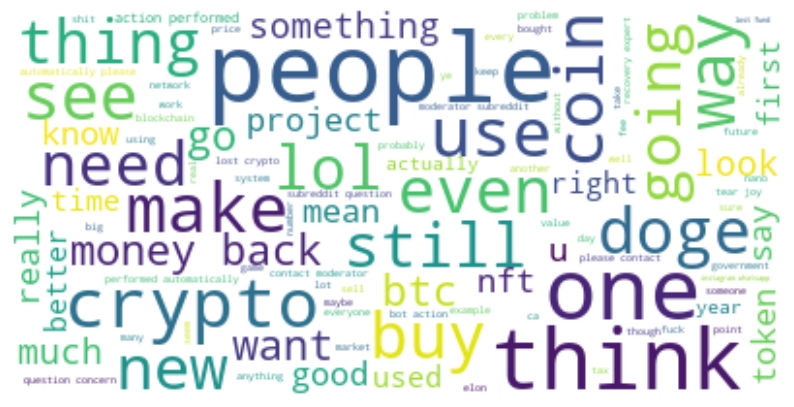

In [9]:
all_processed_text = " ".join(main_df['ProcessedComments'])
wordcloud = WordCloud(background_color='white', max_font_size=50, max_words=100).generate(all_processed_text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

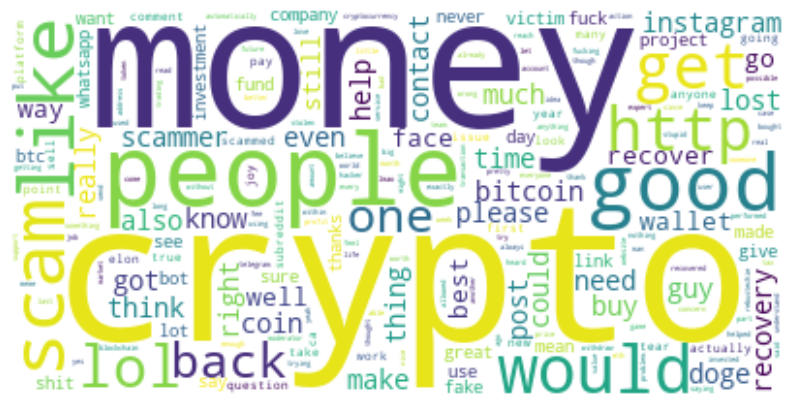

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(main_df['ProcessedComments'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
word_scores = tfidf_df.sum(axis=0).to_dict()
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(word_scores)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

In [11]:
main_df[['ProcessedComments','sentiment']]

,ProcessedComments,sentiment
17722,everyone died one person got rich seems like s...,1
2,u attentive sleuth knew something wrong since ...,-1
22947,setup brave presearch swash provide liquidity ...,1
10942,love tweet week profiting btc,1
4117,tldr member congress hold trade digital asset ...,1
...,...,...
36285,vote feg coin buy billion early cheap possible...,0
2310,feeling people talking b bitcoin fee never rea...,-1
24825,lmao nailed crowd well knowing enough rambling...,1
30614,sure diligence assume every project posted pro...,1


Accuracy: 0.7635294117647059
Precision: 0.763316121261703
Recall: 0.7635294117647059
F1 Score: 0.7480290775609876
              precision    recall  f1-score   support

          -1       0.82      0.68      0.74       568
           0       0.69      0.33      0.45       228
           1       0.75      0.92      0.83       904

    accuracy                           0.76      1700
   macro avg       0.75      0.65      0.67      1700
weighted avg       0.76      0.76      0.75      1700



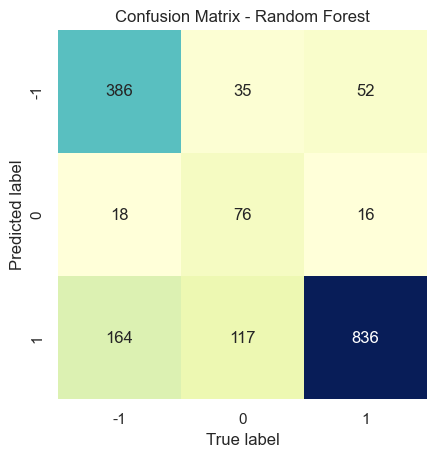

ROC-AUC Score: 0.8958802470522522


In [12]:
#best machine learning algorithm svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

X = main_df['ProcessedComments']
y = main_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = pipeline = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', probability=True))

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

mat = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

class_labels = sorted(y.unique())  # Assuming y contains your class labels
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")
plt.show()

y_test_binarized = label_binarize(y_test, classes=class_labels)
y_pred_proba= pipeline.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='weighted')
print(f"ROC-AUC Score: {roc_auc}")


Accuracy: 0.7547058823529412
Precision: 0.768973790693774
Recall: 0.7547058823529412
F1 Score: 0.748754830271355
              precision    recall  f1-score   support

          -1       0.87      0.58      0.69       568
           0       0.57      0.63      0.60       228
           1       0.76      0.90      0.82       904

    accuracy                           0.75      1700
   macro avg       0.73      0.70      0.70      1700
weighted avg       0.77      0.75      0.75      1700



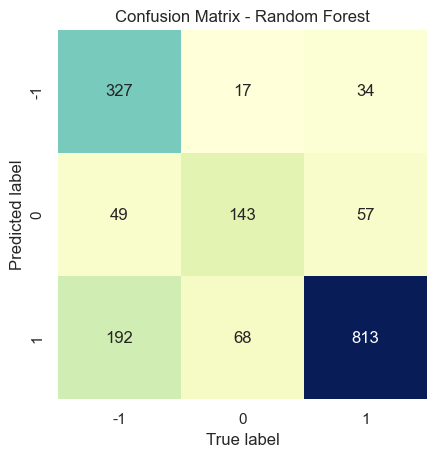

ROC-AUC Score: 0.888914085534158


In [13]:
#machine learning algorithm 2 - RandomForest
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score: {f1}")


# Confusion Matrix
mat_rf = confusion_matrix(y_test, y_pred_rf)

print(classification_report(y_test, y_pred_rf))

class_labels = sorted(y.unique())  # Assuming y contains your class labels
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")
plt.show()

y_test_binarized = label_binarize(y_test, classes=class_labels)
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_binarized, y_pred_proba_rf, multi_class='ovr', average='weighted')
print(f"ROC-AUC Score: {roc_auc}")


In [14]:
#extra preprocessing
# %pip install contractions
import contractions
import re
import unidecode

def expand_contractions(text):
  return contractions.fix(text)
def accented_characters_removal(text):
    # this is a docstring
    """
    The function will remove accented characters from the 
    text contained within the Dataset.
    Example:
    Input : Málaga, àéêöhello
    Output : Malaga, aeeohello    
    """
    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    text = unidecode.unidecode(text)
    return text

def preprocess_comments(text:str):
  text = text.lower()
  text = re.sub("\B\#[A-z0-9_]+\b", "", text)
  text=re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)", "",text)
  text = re.sub("[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", " ", text) #corrected regex
  text = re.sub("\B\@[A-z0-9_]+\b", "", text)
  text=accented_characters_removal(text)
  text=expand_contractions(text)
  tokens = word_tokenize(text)
  tokens = [word.lower() for word in tokens]
  words = [word for word in tokens if word.isalpha()]
  words = [word for word in words if not word in stop_words]
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return " ".join(lemmatized_words)

In [15]:
X_train

20360    maybe case blessed could get one wallet know c...
32260                                    u mean understand
99       something wrong deadman switch havent activate...
1698     know buy back go wo buy make money feel like b...
27634    anyone else check old computer case coin lying...
                               ...                        
30046                                           tough spot
25683                            transaction buy nft happy
26781    bought amount binance back january originally ...
11016    either want proof stake mining clean energy re...
34653    recently misfortune losing fifty thousand poun...
Name: ProcessedComments, Length: 6800, dtype: object

In [20]:
#extra steps using ngram and maxfeature, chisquare select k best, truncated svd for dimensionality reduction
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# Preparing new data
main_df['EnhancedProcessedComments'] = main_df['PostComments'].apply(preprocess_comments)

X = main_df['EnhancedProcessedComments']
y = main_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming main_df and preprocess_comments are defined

# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Now, X_tfidf is the TF-IDF vectorized form of X_train
print("Shape of TF-IDF Matrix:", X_tfidf.shape)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('chi2', SelectKBest(chi2, k=50000)),
    ('svd', TruncatedSVD(n_components=20000, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True))
])

# Training the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

mat = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

class_labels = sorted(y.unique())  # Assuming y contains your class labels
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")
plt.show()

y_test_binarized = label_binarize(y_test, classes=class_labels)
y_pred_proba= pipeline.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='weighted')
print(f"ROC-AUC Score: {roc_auc}")


Shape of TF-IDF Matrix: (6800, 96729)


In [17]:
import pandas as pd

from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(main_df['ProcessedComments'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # Adjust n_components as needed
lda.fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

def get_top_words_for_each_topic(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        top_words[topic_idx] = ", ".join(top_features)
    return top_words

n_top_words = 5
top_words = get_top_words_for_each_topic(lda, tfidf_feature_names, n_top_words)



In [18]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA


doc_topic_dist = lda.transform(tfidf)

pca = PCA(n_components=2)
doc_topic_dist_2d = pca.fit_transform(doc_topic_dist)

df_plot = pd.DataFrame(doc_topic_dist_2d, columns=['Component 1', 'Component 2'])
df_plot['Dominant Topic'] = doc_topic_dist.argmax(axis=1)

df_plot['Top Words in Dominant Topic'] = df_plot['Dominant Topic'].apply(lambda x: top_words[x])

fig = px.scatter(df_plot, x='Component 1', y='Component 2', color='Dominant Topic',
                 hover_data=['Top Words in Dominant Topic'],
                 color_continuous_scale=px.colors.qualitative.D3,
                 title="LDA Topic Model Visualization with Top Words",
                 labels={"Dominant Topic": "Dominant Topic", "Component 1": "PCA Component 1", "Component 2": "PCA Component 2"})

fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()


In [19]:
#Trying out some simple machine learning models

